In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

def plot_difference(X1,X2,Z1,Z2):
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(111)
    Xs, rats= [], []
    for row in range(len(X1)):
        if Z1[row]>0 and Z2[row]>0:
            rat = Z2[row] / Z1[row]
            #print X1[row], rat
            Xs.append(X1[row]); rats.append(rat)
    ax.plot(Xs, rats)
    ax.grid()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #ax.set_xlabel('', fontsize=18); ax.set_ylabel('Ratio', fontsize=18)
    ## 美化一下。。。
    # plt.savefig(r'2pcf difference.pdf', format='pdf')
    plt.show()
    # plt.savefig(r'2pcf difference'.pdf, format='pdf')

Populating the interactive namespace from numpy and matplotlib


### COLA particle?

### COLA FOF halo, BigMD Rockstar halo

In [3]:
!ls -alh /home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf

-rw-r--r-- 1 xiaodongli xiaodongli 1.6M 3月  11 12:06 /home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf


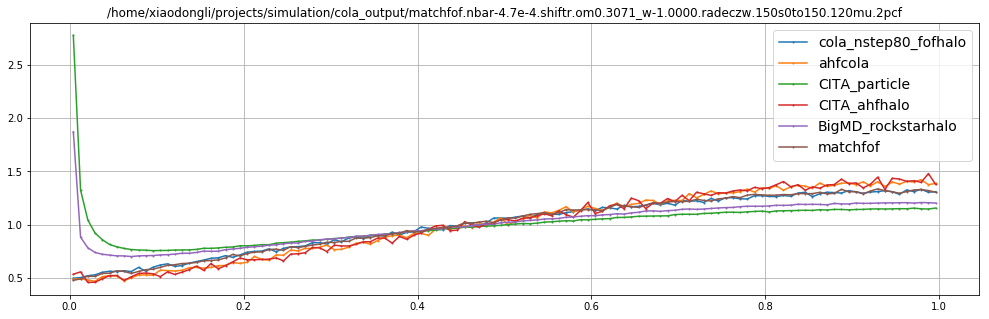

In [9]:
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(111)
for filename_label in [
    ['/home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_nstep80_fofhalo'],
    #['/home/xiaodongli/projects/simulation/cola_output_nstep80/sub00001c.txt.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'cola_nstep80_particle'],
    #['/home/xiaodongli/projects/simulation/cola_output_nstep40/sub00001c.txt.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'cola_nstep40_particle'],
    #['/home/xiaodongli/projects/simulation/cola_output_nstep20/sub00001c.txt.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'cola_nstep40_particle'],
    ['/home/xiaodongli/projects/simulation/cola_output_nstep20/ahfcola_halos.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'ahfcola'],
    #['/home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_nstep80_noshift'],
    #['/home/xiaodongli/projects/simulation/cola_output_128box_800c/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_output_128box_800c_fofhalo'],
    #['/home/xiaodongli/projects/simulation/cola_output_nstep40/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf',
    # 'cola_nstep40_fofhalo'],
    #['/home/xiaodongli/projects/simulation/cola_output/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_nstep10_fofhalo'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_016.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_015.halos.nbar-4.7e-4.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf',
     'CITA_ahfhalo'],
    ['/public/projects/cf_pks/BigMDPL_mge1e13/old2pcf/BigMDPL_mge1e13.csv.snap79.shiftr.nbar-4.7e-4.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'BigMD_rockstarhalo'],
    ['/home/xiaodongli/projects/simulation/cola_output/matchfof.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf',
     'matchfof']
    ]:
    filename, label = filename_label
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]

    int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
    Y = intximu/int_intximu_to_mu
    #Y = intximu

    ax.plot(X, Y, marker='o', markersize=1, label=label )
    ax.set_title(filename)
ax.grid()
ax.legend(fontsize=14)

### BigMD Rockstar halo

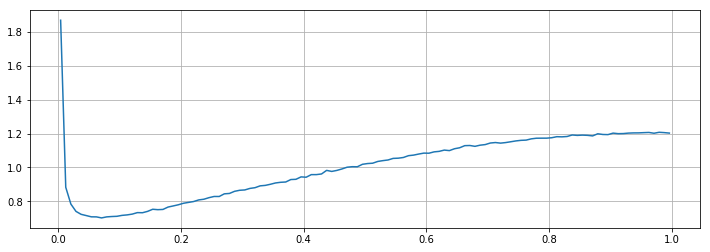

In [6]:
filename = '/home/xiaodongli/projects/cf_pks/BigMDPL_mge1e13/BigMDPL_mge1e13.csv.snap79.shiftr.nbar-4.7e-4.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
data = np.loadtxt(filename)
numsbin=150; nummubin=120;
s_min=6; s_max = 40;

xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
for rows in range(numsbin):
    for rowmu in range(nummubin):
        irow = rows*nummubin+rowmu
        DD = data[irow][3]/norms[0]
        DR = data[irow][4]/norms[1]
        RR = data[irow][6]/norms[2]
        xi[rows][rowmu] = (DD - 2*DR + RR)/RR
intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
mu = [data[row][0] for row in range(120)]
mu_1 = [1-data[row][0] for row in range(120)]
dmu = [mu[i+1]-mu[i] for i in range(119)]

int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
xidelsmu = intximu/int_intximu_to_mu

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.plot(mu_1,xidelsmu)
ax.grid()

### CITA N-body, particle

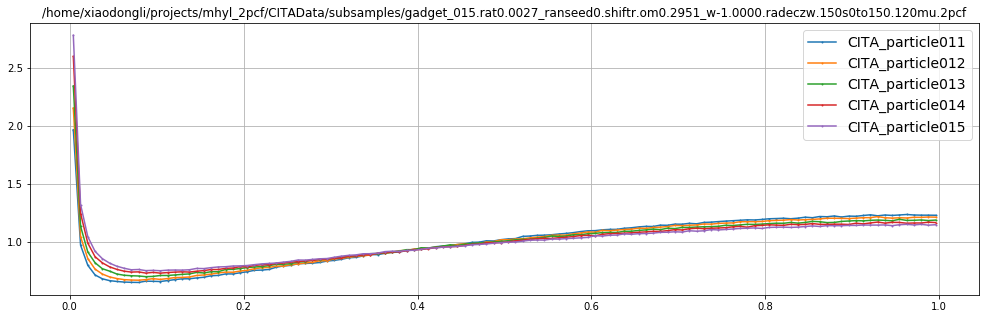

In [6]:
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(111)
for filename_label in [
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_011.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle011'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_012.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle012'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_013.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle013'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_014.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle014'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_015.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle015']
    ]:
    filename, label = filename_label
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]

    int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
    Y = intximu/int_intximu_to_mu
    #Y = intximu

    ax.plot(X, Y, marker='o', markersize=1, label=label )
    ax.set_title(filename)
ax.grid()
ax.legend(fontsize=14)

### CITA N-body, FOF halo?

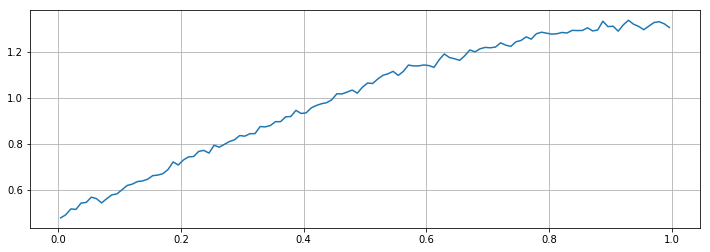

In [3]:
filename = '/home/xiaodongli/projects/simulation/cola_output/matchfof.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
data = np.loadtxt(filename)
numsbin=150; nummubin=120;
s_min=6; s_max = 40;

xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
for rows in range(numsbin):
    for rowmu in range(nummubin):
        irow = rows*nummubin+rowmu
        DD = data[irow][3]/norms[0]
        DR = data[irow][4]/norms[1]
        RR = data[irow][6]/norms[2]
        xi[rows][rowmu] = (DD - 2*DR + RR)/RR
intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
mu = [data[row][0] for row in range(120)]
mu_1 = [1-data[row][0] for row in range(120)]
dmu = [mu[i+1]-mu[i] for i in range(119)]

int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
xidelsmu = intximu/int_intximu_to_mu

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.plot(mu_1,xidelsmu)
ax.grid()
#print int_intximu_to_mu